<a href="https://colab.research.google.com/github/juliazhu09/TextAnalysis/blob/main/Text_Analysis_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Text Analysis

### Xiaojuan Zhu
### OIT Research Computing Support
### Help Desk: 865-974-9900 

In [ ]:
import sklearn
print(sklearn.__version__)

1.0.2


In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==1.0.2

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 1.5 MB/s 


In [ ]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('omw-1.4')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import numpy as np 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk import ngrams
from collections import Counter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


WallStreetBets (r/wallstreetbets, also known as WSB), is a subreddit where participants discuss stock and option trading. It has become notable for its profane nature and allegations of users manipulating securities.

The community became mainstream again with its interest on GameStop shares in 2021.

The data might contain a small percent of harsh language, the posts were not filtered. 

We want to figure out why and how it happens and we'll try to to find what are the main topics in the body of the wallstreetbets posts.

In [ ]:
import pandas as pd
# reading in the dataset
url = "https://drive.google.com/uc?id=17H5Y6EEQ-80VOwfYViW8GSB1w-QUOGDD&authuser=xzhu8%40vols.utk.edu&usp=drive_fs"
df = pd.read_csv(url)
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56


In [ ]:
df.shape

(22521, 9)

First of all, let's drop the missing values in the column named "body".

In [ ]:
df.dropna(subset=['body'], inplace=True)
df['original_body'] = df['body']
df.shape

(22521, 9)

In [ ]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp,original_body
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...


##Text Cleaning & Preprocessing

One of the most crucial phases when dealing with unstructured data such as text is the cleaning/preprocessing step. Sometimes this process is even more important than the model-building part.

It is better to remove words that don't carry much information about the post itself such as punctuation, stop words, and others...

In this section, I'm going to clean the body of the DataFrame preparing it for the successive phases.

The cleaning steps that I'm going to apply are:

* Removal of URLs
* Removal of punctuation
* Tokenization
* Removal of stopwords
* Lemmatization
* Removal of other non-meaningful characters

### Remove Urls
First, we need to remove the url, like the string starts with "https" or "www". We import **re** package and we define a function named remove urls. In the function we use the complie function to tell python the string starting with https and www are the url string and needs to be replaced by space. The we use sub function to remove those strings. 

In [ ]:
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
  

apply() function simplifies applying a function on each element in a pandas series and each row or column in a pandas DataFrame. We use apply function to apply the remove_urls function to the body column. 


In [ ]:
df['body'] = df['body'].apply(remove_urls)
df.head(10)

,title,score,id,url,comms_num,created,body,timestamp,original_body
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isn't fair. My mother always told me that...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs. GME... who would have tho...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...
13,$GME price has nothing to do with fundamentals...,382,l6u96y,https://www.reddit.com/r/wallstreetbets/commen...,61,1.611861e+09,"Firstly, all of you diamond hands and smooth-b...",2021-01-28 21:15:58,"Firstly, all of you diamond hands and smooth-b..."
19,"Daily Discussion Thread for January 28, 2021",841,l6u011,https://www.reddit.com/r/wallstreetbets/commen...,5942,1.611860e+09,Your daily trading discussion thread. Please k...,2021-01-28 21:00:15,Your daily trading discussion thread. Please k...
21,We need to stick together and 💎🖐 the ever lovi...,1172,l6two5,https://www.reddit.com/r/wallstreetbets/commen...,323,1.611860e+09,This is our time. If anyone will listen to you...,2021-01-28 20:54:08,This is our time. If anyone will listen to you...
23,I'm so proud of how far this subreddit has come,458,l6tuae,https://www.reddit.com/r/wallstreetbets/commen...,89,1.611860e+09,I still remember when I first joined and most ...,2021-01-28 20:49:39,I still remember when I first joined and most ...
30,Are we ready to attack the Citadel !!!!,152,l6to43,https://www.reddit.com/r/wallstreetbets/commen...,32,1.611859e+09,,2021-01-28 20:37:36,https://youtu.be/BtjhgcAMYU0


###Remove punctuation

We're going to remove punctuation. In order to remove punctuation, we have to actually have a way to show Python what punctuation even looks like. Here, the string package has a list of punctuation in it. So, I'll import string, and then all we need to do is just call string.punctuation, and we can run that, and that'll print out a list of different punctuation. So, this is really helpful to allow Python to identify what we're looking for here. The reason that we care about this is that periods, parentheses, and other punctuation look like just another character to Python. But realistically, the period doesn't really help pull the meaning out of a sentence. For instance, for us "Dog eats bones.", with a period, is exactly the same as, "Dog eats bones" without a period. They mean the same thing to us, but when you give that to Python, Python says those are not equivalent things. And Python isn't saying "Dog eats bones" without a period is different than "Dog eats bones" with a period, in that they're really close, but one has a period and one doesn't. 

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
"Dog eats bones." == "Dog eats bones"


False

In [ ]:
def remove_punct(text):
   text_nopunct = "".join([char for char in text if char not in string.punctuation])
   return text_nopunct
df['body'] = df['body'].apply(remove_punct)
df.head(10)

,title,score,id,url,comms_num,created,body,timestamp,original_body
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isnt fair My mother always told me that w...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs GME who would have thought...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...
13,$GME price has nothing to do with fundamentals...,382,l6u96y,https://www.reddit.com/r/wallstreetbets/commen...,61,1.611861e+09,Firstly all of you diamond hands and smoothbra...,2021-01-28 21:15:58,"Firstly, all of you diamond hands and smooth-b..."
19,"Daily Discussion Thread for January 28, 2021",841,l6u011,https://www.reddit.com/r/wallstreetbets/commen...,5942,1.611860e+09,Your daily trading discussion thread Please ke...,2021-01-28 21:00:15,Your daily trading discussion thread. Please k...
21,We need to stick together and 💎🖐 the ever lovi...,1172,l6two5,https://www.reddit.com/r/wallstreetbets/commen...,323,1.611860e+09,This is our time If anyone will listen to you ...,2021-01-28 20:54:08,This is our time. If anyone will listen to you...
23,I'm so proud of how far this subreddit has come,458,l6tuae,https://www.reddit.com/r/wallstreetbets/commen...,89,1.611860e+09,I still remember when I first joined and most ...,2021-01-28 20:49:39,I still remember when I first joined and most ...
30,Are we ready to attack the Citadel !!!!,152,l6to43,https://www.reddit.com/r/wallstreetbets/commen...,32,1.611859e+09,,2021-01-28 20:37:36,https://youtu.be/BtjhgcAMYU0


### Tokenization 
Tokenizing is splitting some string or sentence into a list of words. 
The \W+, indicates that it will split wherever it sees one or more non-word characters. So that'll split on white spaces, special characters, anything like that. 

In [ ]:
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['body_text_tokenized'] = df['body'].apply(lambda x:tokenize(x.lower())) # make the token lower cases
df.head()

,title,score,id,url,comms_num,created,body,timestamp,original_body,body_text_tokenized
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...,"[the, ceo, of, nasdaq, pushed, to, halt, tradi..."
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...,"[hedgefund, whales, are, spreading, disinfo, s..."
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isnt fair My mother always told me that w...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...,"[life, isnt, fair, my, mother, always, told, m..."
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...,"[, i, believe, right, now, is, one, of, those,..."
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs GME who would have thought...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...,"[you, guys, are, champs, gme, who, would, have..."


Python is case-sensitive, so if you give it capital NLP, and ask if its the same as lowercase nlp, we know to us, that's basically the same thing, but if you run that for Python, Python says those are two different things. So when we get in to further steps, now Python is seeing capital NLP is something totally different than lowercase nlp, and it has to learn that those things are closely related, but we don't want it to consume its resources by learning that those things are related, we want it to explicitly tell it that those are the same things. So that's why we apply this .lower method

In [ ]:
"NLP" == "nlp"

False

###Remove stop words
We want to remove some of the more irrelevant words in the lists. The stop words are commonly-used words like the, but, if, that don't contribute much to the meaning of a sentence. So we want to remove them, to limit the number of tokens Python actually has to look at when building our model. 

For example: **"I am learning NLP"** After tokenizing, it would have four tokens, **I**, **am**, **learning**, and **NLP**. After removing stopwords, instead of a list with four tokens, you're now left with just **learning** and **NLP**.

We will call the stopwords from the nltk package and we tell it want to use English stop words. 

Then we create a function to remove the stop words. 


In [ ]:
import nltk

stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(tokenized_list):
    # I want to return word for word in tokenized_list if that word is not in stopword. 
    text = [word for word in tokenized_list if word not in stopword]
    return text

df['body_text_nostop'] = df['body_text_tokenized'].apply(remove_stopwords)
df.head()

,title,score,id,url,comms_num,created,body,timestamp,original_body,body_text_tokenized,body_text_nostop
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...,"[the, ceo, of, nasdaq, pushed, to, halt, tradi...","[ceo, nasdaq, pushed, halt, trading, give, inv..."
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...,"[hedgefund, whales, are, spreading, disinfo, s...","[hedgefund, whales, spreading, disinfo, saying..."
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isnt fair My mother always told me that w...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...,"[life, isnt, fair, my, mother, always, told, m...","[life, isnt, fair, mother, always, told, would..."
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...,"[, i, believe, right, now, is, one, of, those,...","[, believe, right, one, rare, opportunities, h..."
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs GME who would have thought...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...,"[you, guys, are, champs, gme, who, would, have...","[guys, champs, gme, would, thought, bunch, cra..."


### Stemming and Lemmatizaing
**Stemming**: the process of reducing inflected (or derived) words to their word stem or root. More simply put, the process of stemming means often crudely chopping off the end of a word, to leave only the base. Stemming's goal is to reduce the number of words python has to look at or consider. 
For example, Stemming/stemmed will be reduced to stem. 
Electricity/electrical will be reduced to Electr. 
Connection/connected/connective will be chopped down to connect. 

Stemmers are corect in most cases, but the tradeoff with these simple rules is that is won't always be right. For example, geesee and goose are two separate things after stemming, that means it has to keep those two separate words in memory.  So we need to use lemmatizating. 

**Lemmatizating**:  the process of grouping together the inflected forms of a word so they can be analyzed as a single term, identified by the word's lemma. The lemma is the canonical form of a set of words. For example, goose and geese, it will return goose. 

Lemmatizing is using vocabulary analysis of words to remove inflectional endings and return to the dictionary form of a word.

In practical terms, there's an accuracy and speed trade-off that you're making when you opt for one over the other. 

In [ ]:
import nltk
wn =  nltk.WordNetLemmatizer()
ps =  nltk.PorterStemmer()
print(ps.stem('goose'))
print(ps.stem('geese'))

print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goos
gees
goose
goose


In [ ]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['body_text_lemmatized'] = df['body_text_nostop'].apply(lambda x: lemmatizing(x))

In [ ]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp,original_body,body_text_tokenized,body_text_nostop,body_text_lemmatized
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...,"[the, ceo, of, nasdaq, pushed, to, halt, tradi...","[ceo, nasdaq, pushed, halt, trading, give, inv...","[ceo, nasdaq, pushed, halt, trading, give, inv..."
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...,"[hedgefund, whales, are, spreading, disinfo, s...","[hedgefund, whales, spreading, disinfo, saying...","[hedgefund, whale, spreading, disinfo, saying,..."
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isnt fair My mother always told me that w...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...,"[life, isnt, fair, my, mother, always, told, m...","[life, isnt, fair, mother, always, told, would...","[life, isnt, fair, mother, always, told, would..."
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...,"[, i, believe, right, now, is, one, of, those,...","[, believe, right, one, rare, opportunities, h...","[, believe, right, one, rare, opportunity, hel..."
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs GME who would have thought...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...,"[you, guys, are, champs, gme, who, would, have...","[guys, champs, gme, would, thought, bunch, cra...","[guy, champ, gme, would, thought, bunch, crazy..."


### Remove other characters

In [ ]:
other_chars = ['*', '#', '&x200B', '[', ']', '; ',' ;' "&nbsp", "“","“","”", "x200b","_", ',']

def remove_other_chars(tokenized_list):
  text = [word for word in tokenized_list if word not in other_chars]
  return text

df['body_text_nochars'] = df['body_text_lemmatized'].apply(remove_other_chars)

df.head()

,title,score,id,url,comms_num,created,body,timestamp,original_body,body_text_tokenized,body_text_nostop,body_text_lemmatized,body_text_nochars
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...,"[the, ceo, of, nasdaq, pushed, to, halt, tradi...","[ceo, nasdaq, pushed, halt, trading, give, inv...","[ceo, nasdaq, pushed, halt, trading, give, inv...","[ceo, nasdaq, pushed, halt, trading, give, inv..."
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...,"[hedgefund, whales, are, spreading, disinfo, s...","[hedgefund, whales, spreading, disinfo, saying...","[hedgefund, whale, spreading, disinfo, saying,...","[hedgefund, whale, spreading, disinfo, saying,..."
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isnt fair My mother always told me that w...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...,"[life, isnt, fair, my, mother, always, told, m...","[life, isnt, fair, mother, always, told, would...","[life, isnt, fair, mother, always, told, would...","[life, isnt, fair, mother, always, told, would..."
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...,"[, i, believe, right, now, is, one, of, those,...","[, believe, right, one, rare, opportunities, h...","[, believe, right, one, rare, opportunity, hel...","[, believe, right, one, rare, opportunity, hel..."
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs GME who would have thought...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...,"[you, guys, are, champs, gme, who, would, have...","[guys, champs, gme, would, thought, bunch, cra...","[guy, champ, gme, would, thought, bunch, crazy...","[guy, champ, gme, would, thought, bunch, crazy..."


In [ ]:
df['clean_text'] = df['body_text_nochars'].apply(lambda x : ' '.join(x))
df.head()


,title,score,id,url,comms_num,created,body,timestamp,original_body,body_text_tokenized,body_text_nostop,body_text_lemmatized,body_text_nochars,clean_text
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35,The CEO of NASDAQ pushed to halt trading “to g...,"[the, ceo, of, nasdaq, pushed, to, halt, tradi...","[ceo, nasdaq, pushed, halt, trading, give, inv...","[ceo, nasdaq, pushed, halt, trading, give, inv...","[ceo, nasdaq, pushed, halt, trading, give, inv...",ceo nasdaq pushed halt trading give investor c...
6,SHORT STOCK DOESN'T HAVE AN EXPIRATION DATE,317,l6uf6d,https://www.reddit.com/r/wallstreetbets/commen...,53,1.611862e+09,Hedgefund whales are spreading disinfo saying ...,2021-01-28 21:26:27,Hedgefund whales are spreading disinfo saying ...,"[hedgefund, whales, are, spreading, disinfo, s...","[hedgefund, whales, spreading, disinfo, saying...","[hedgefund, whale, spreading, disinfo, saying,...","[hedgefund, whale, spreading, disinfo, saying,...",hedgefund whale spreading disinfo saying frida...
7,THIS IS THE MOMENT,405,l6ub9l,https://www.reddit.com/r/wallstreetbets/commen...,178,1.611862e+09,Life isnt fair My mother always told me that w...,2021-01-28 21:19:31,Life isn't fair. My mother always told me that...,"[life, isnt, fair, my, mother, always, told, m...","[life, isnt, fair, mother, always, told, would...","[life, isnt, fair, mother, always, told, would...","[life, isnt, fair, mother, always, told, would...",life isnt fair mother always told would compla...
10,"We need to keep this movement going, we all ca...",222,l6uao1,https://www.reddit.com/r/wallstreetbets/commen...,70,1.611862e+09,I believe right now is one of those rare oppo...,2021-01-28 21:18:25,I believe right now is one of those rare oppo...,"[, i, believe, right, now, is, one, of, those,...","[, believe, right, one, rare, opportunities, h...","[, believe, right, one, rare, opportunity, hel...","[, believe, right, one, rare, opportunity, hel...",believe right one rare opportunity help good ...
12,"Once you're done with GME - $AG and $SLV, the ...",0,l6u9wu,https://www.reddit.com/r/wallstreetbets/commen...,16,1.611861e+09,You guys are champs GME who would have thought...,2021-01-28 21:17:10,You guys are champs. GME... who would have tho...,"[you, guys, are, champs, gme, who, would, have...","[guys, champs, gme, would, thought, bunch, cra...","[guy, champ, gme, would, thought, bunch, crazy...","[guy, champ, gme, would, thought, bunch, crazy...",guy champ gme would thought bunch crazy retard...


In [ ]:
body_list = df.clean_text.tolist()
body_list[:10]

['ceo nasdaq pushed halt trading give investor chance recalibrate position sec investigating broker disallowing buying call institution flat admitting change rule bail rich happens u get well shuck known investing risky tried cutting avocado coffee maybe uber side may collectively driven enough sentiment wall street make big player go long gme u money move stock much alone hurt wall street whole fund went others went profited short u medium want pin blame u crystal clear rigged game time build new exchange arbitrarily change rule u cro version maybe repurposed trade stock without government intervention know exactly look like yet broad next step see 1 exit current financial system 2 build new one',
 'hedgefund whale spreading disinfo saying friday makeorbreak gme call option expiring itm friday drive price level maintained may trigger short squeeze may friday could next week see real squeeze dont panic squeeze doesnt happen friday guaranteed thing guaranteed mathematically short cover 

##Word Frequency



In [ ]:
wordstring = 'it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness'

wordlist = wordstring.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

print("String\n" + wordstring +"\n")
print("List\n" + str(wordlist) + "\n")
print("Frequencies\n" + str(wordfreq) + "\n")
print("Pairs\n" + str(list(zip(wordlist, wordfreq))))

String
it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness

List
['it', 'was', 'the', 'best', 'of', 'times', 'it', 'was', 'the', 'worst', 'of', 'times', 'it', 'was', 'the', 'age', 'of', 'wisdom', 'it', 'was', 'the', 'age', 'of', 'foolishness']

Frequencies
[4, 4, 4, 1, 4, 2, 4, 4, 4, 1, 4, 2, 4, 4, 4, 2, 4, 1, 4, 4, 4, 2, 4, 1]

Pairs
[('it', 4), ('was', 4), ('the', 4), ('best', 1), ('of', 4), ('times', 2), ('it', 4), ('was', 4), ('the', 4), ('worst', 1), ('of', 4), ('times', 2), ('it', 4), ('was', 4), ('the', 4), ('age', 2), ('of', 4), ('wisdom', 1), ('it', 4), ('was', 4), ('the', 4), ('age', 2), ('of', 4), ('foolishness', 1)]


In [ ]:
comments =" ".join(df['clean_text'])
words = tokenize(comments)
words[:10]


['ceo',
 'nasdaq',
 'pushed',
 'halt',
 'trading',
 'give',
 'investor',
 'chance',
 'recalibrate',
 'position']

Here we use the Counter function from collections package to count the words. 

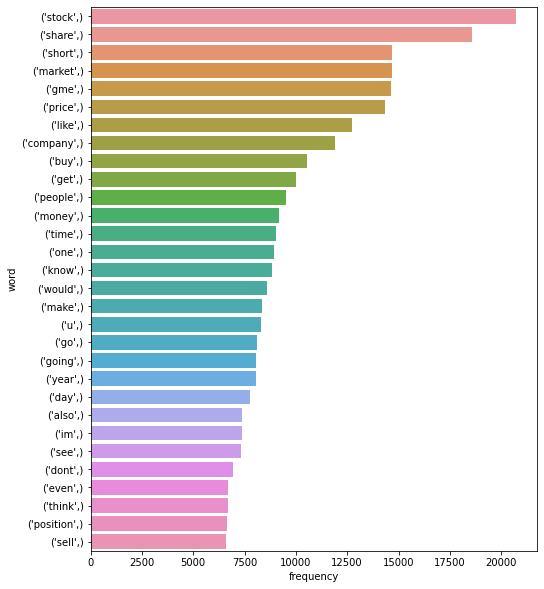

In [ ]:
from collections import Counter
counted =Counter(ngrams(words,1)) 
data = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
plt.figure(figsize=(8, 10))
sns.barplot(x='frequency',y='word',data=data.head(30))


As you might guess in the top 5 we have the name of the stock that made r/wsb famous, we are talking about GME and the company name is GameStop Corp.

Whereas if you look further in the top 40 you might encounter words like: stock, market, sell, share, company, ... which are all words related to the financial world.

Let us generate the word cloud. 

In [ ]:
from wordcloud import WordCloud, STOPWORDS

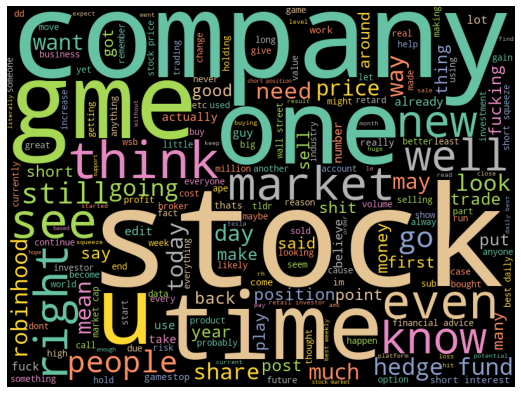

In [ ]:
fig_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', 
                          colormap='Set2', width=800, height=600
                         ).generate(comments)

plt.figure(figsize=(10, 7), frameon=True)
plt.imshow(fig_wordcloud)
plt.axis('off')
plt.show()

We have successfully generated our first-word cloud image. It shows that most of the data talk about “STOCK”, “Company”, “Gme”, “Market”.

Let's now see what are the most common bigrams and trigrams in the dataset. Here I see gme and amc as a pair. 

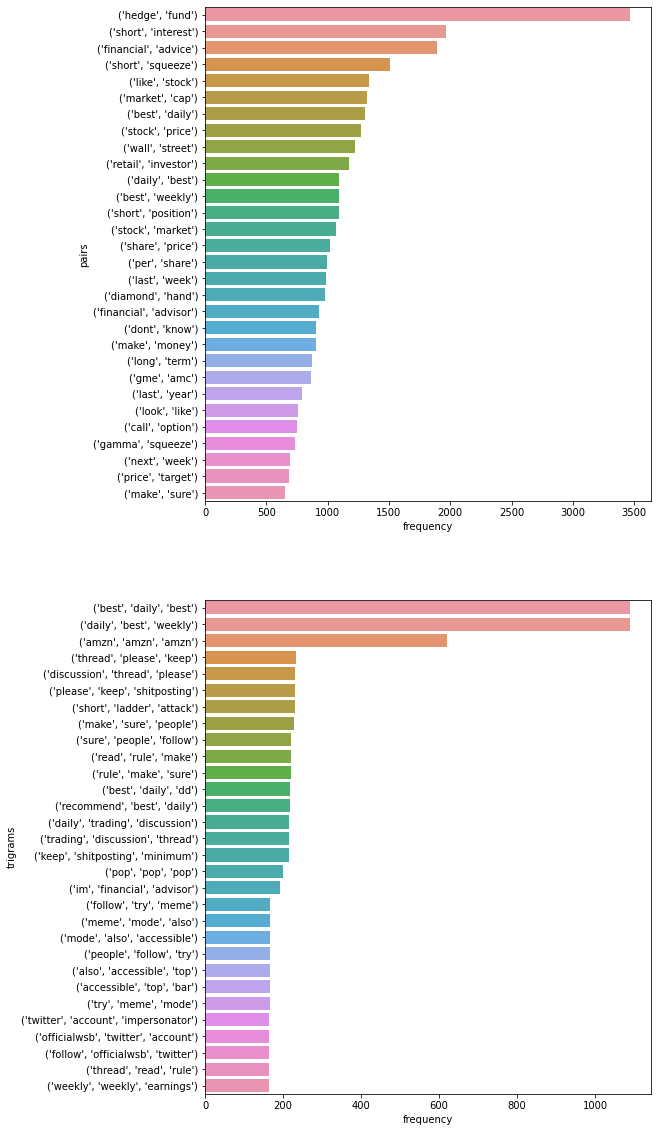

In [ ]:
# top 2 pairs and top 3
counted_2 =Counter(ngrams(words,2))
counted_3= Counter(ngrams(words,3))
word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
#word_pairs
#plt.figure(figsize=(8, 25))
#sns.barplot(y=counted_2, x=word_pairs)
fig, axes = plt.subplots(2,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='pairs',data=word_pairs.head(30))
sns.barplot(ax=axes[1],x='frequency',y='trigrams',data=trigrams.head(30))

#Topic modelling

Next, we are applying NMF and LatentDirichletAllocation on the comments and extract additive models of the topic structure of the corpus. The output is a plot of topics, each represented as bar plot using top few words based on weights.


### Text Vectorization
Before we apply NMF and LDA, we need to vectorize the text data. Vectorizing is a process that we use to convert text to a form that Python and a machine learning model can understand. It is the process of converting text into numerical representation.  

Here are three methods to accomplish text vectorization: 


*   Count vectoization: 
*   N-grams
*   Term frequency-invere document frequency (TF-IDF)



### Count Vectoization
Creates a document-term matrix then entry of each cell will be a count of the number of times that word occurred in that document. 

Here is an example:

In [ ]:
corpus = ["This is a brown house. This house is big. The street number is 1.",
          "This is a small house. This house has 1 bedroom. The street number is 12.",
          "This dog is brown. This dog likes to play.",
          "The dog is in the bedroom."]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
Count_vectorizer = CountVectorizer(stop_words="english")
X_count = Count_vectorizer.fit_transform(corpus)
df =  pd.DataFrame(X_count.toarray(), columns = Count_vectorizer.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,12,bedroom,big,brown,dog,house,likes,number,play,small,street
0,0,0,1,1,0,2,0,1,0,0,1
1,1,1,0,0,0,2,0,1,0,1,1
2,0,0,0,1,2,0,1,0,1,0,0
3,0,1,0,0,1,0,0,0,0,0,0


### N-Grams
Creates a documents-term matrix where counts still occupy the cell but instead of the columns representing single term, they represent all combinations of adjacent words of length in the text.   

n=2: bigram (pull out all combinations of two adjacent words in our string)

n=3: trigrams (pull all combinations of three adjacent words in our string)

Let us look at the example, n=2


In [ ]:
ngram_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words="english")
ngram_count = ngram_vectorizer.fit_transform(corpus)
df =  pd.DataFrame(ngram_count.toarray(), columns = ngram_vectorizer.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bedroom street,big street,brown dog,brown house,dog bedroom,dog brown,dog likes,house bedroom,house big,house house,likes play,number 12,small house,street number
0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
1,1,0,0,0,0,0,0,1,0,1,0,1,1,1
2,0,0,1,0,0,1,1,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### TF-IDF Equation

$$ W_{i,j} = tf_{i,j}  \times log({N \over df_i}) $$

$tf_{i,j}=$ number of times i occurs in j divided by total number of terms in j

$df_i=$ number of documents containing i

$N =$ total number of documents.   

For example, 
"I like NLP".

$$ tf_{NLP,j} = {\frac{\text{# of occurences of NLP}}{\text{number of words in the text}}} = 1/3 $$ 

There are total 20 text sentences and only 1 of those contains NLP.  

$N = 20$ and $df_{NLP} = 1 $

$ w_{i,j} = tf_{i,j} \times log({N \over df_i})$

$ w_{i,j} = 1/3 \times log(20/1) = 0.43  $

Now let's say that you have 40 text messages instead of 20, but NLP still only occurs in one of them. Now this fraction is 40 over 1. The term NLP is less frequent, and this term collectively is going to be larger.Basically, all this says is that the rarer the word is, the higher that this value's going to be. In summary, this method helps us pull out important but seldom-used words. 






In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = tf_vectorizer.fit_transform(corpus)
df =  pd.DataFrame(X_tfidf.toarray(), columns = tf_vectorizer.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,12,bedroom,big,brown,dog,house,likes,number,play,small,street
0,0.000000,0.000000,0.432291,0.340823,0.000000,0.681647,0.000000,0.340823,0.000000,0.000000,0.340823
1,0.396802,0.312843,0.000000,0.000000,0.000000,0.625687,0.000000,0.312843,0.000000,0.396802,0.312843
2,0.000000,0.000000,0.000000,0.348842,0.697684,0.000000,0.442462,0.000000,0.442462,0.000000,0.000000
3,0.000000,0.707107,0.000000,0.000000,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


###What is Topic Modeling?

Topic modeling is an unsupervised technique that intends to analyze large volumes of text data by clustering the documents into groups. In the case of topic modeling, the text data do not have any labels attached to it. Rather, topic modeling tries to group the documents into clusters based on similar characteristics.

A typical example of topic modeling is clustering a large number of newspaper articles that belong to the same category. In other words, cluster documents that have the same topic. It is important to mention here that it is extremely difficult to evaluate the performance of topic modeling since there are no right answers. It depends upon the user to find similar characteristics between the documents of one cluster and assign it an appropriate label or topic.

Two approaches are mainly used for topic modeling: Latent Dirichlet Allocation and Non-Negative Matrix factorization. Next, we will briefly review both of these approaches and will see how they can be applied to topic modeling in Python.

**Non-Negative Matrix Factorization (NMF)**
Non-negative matrix factorization is also a unsupervised learning technique which performs clustering as well as dimensionality reduction. In text mining consider the bag-of-words matrix representation where each row corresponds to a word, and each column to a document.

NMF will produce two matrices W and H. The columns of W can be interpreted as basis documents (bags of words). What interpretation can we give to such a basis document in this case? They represent topics! Sets of words found simultaneously in different documents. H tells us how to sum contributions from different topics to reconstruct the word mix of a given original document.
<img src="https://drive.google.com/uc?id=17eF4KRsqdEQjdBkiF4b87_NchASCh0qE&authuser=xzhu8%40vols.utk.edu&usp=drive_fs" width="800" height="600" />


Therefore, given a set of documents, NMF identifies topics and simultaneously classifies the documents among these different topics.

Reference: https://blog.acolyer.org/2019/02/18/the-why-and-how-of-nonnegative-matrix-factorization/

**Latent Dirichlet Allocation (LDA)**
The LDA is based upon two general assumptions:

Documents that have similar words usually have the same topic.
Documents that have groups of words frequently occurring together usually have the same topic.
These assumptions make sense because the documents that have the same topic, for instance, Business topics will have words like the "economy", "profit", "the stock market", "loss", etc. The second assumption states that if these words frequently occur together in multiple documents, those documents may belong to the same category.

Mathematically, the above two assumptions can be represented as:

* Documents are probability distributions over latent topics
* Topics are probability distributions over words

![image](https://drive.google.com/uc?id=17eJ1yYu2UlBqPbQWDQTDtfMakTgIYO9e&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

For example: suppose we have the following set of sentences:


*   I eat fish and vegetables
*   Fish are pets
*   My kitten eats fish 

![image](https://drive.google.com/uc?id=17kv2RkTxRuFOGkvyflK-PNhRoH2E5AMY&authuser=xzhu8%40vols.utk.edu&usp=drive_fs)

Given the above sentences, LDA might classify the red words under the Topic F, which we might label as “food“. Similarly, blue words might be classified under a separate Topic P, which we might label as “pets“. LDA defines each topic as a bag of words, and you have to label the topics as you deem fit.

There are 2 benefits from LDA defining topics on a word-level:

1) We can infer the content spread of each sentence by a word count:

> Sentence 1: 100% Topic F

> Sentence 2: 100% Topic P

> Sentence 3: 33% Topic P and 67% Topic F

2) We can derive the proportions that each word constitutes in given topics. 

For example, Topic F might comprise words in the following proportions: 40% eat (2), 40% fish(2), 20% vegetables(1).

LDA achieves the above results in 3 steps.

To illustrate these steps, imagine that we are now discovering topics in documents instead of sentences. 

**Step 1**: You tell the algorithm how many topics you think there are.

**Step 2**: The algorithm will assign every word to a temporary topic. 

**Step 3**: The algorithm will check and update topic assignments, looping through each word in every document. 

The process of checking topic assignment is repeated for each word in every document, cycling through the entire collection of documents multiple times. This iterative updating is the key feature of LDA that generates a final solution with coherent topics.

Reference: https://towardsdatascience.com/latent-dirichlet-allocation-15800c852699


In [ ]:
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_features = 1000
n_components = 10
n_top_words = 20

Create a topic plot function

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


Extracting tf-idf features for NMF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(body_list)

Use tf (raw term count) features for LDA.

In [ ]:
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tf = tf_vectorizer.fit_transform(body_list)

Fit the NMF model

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


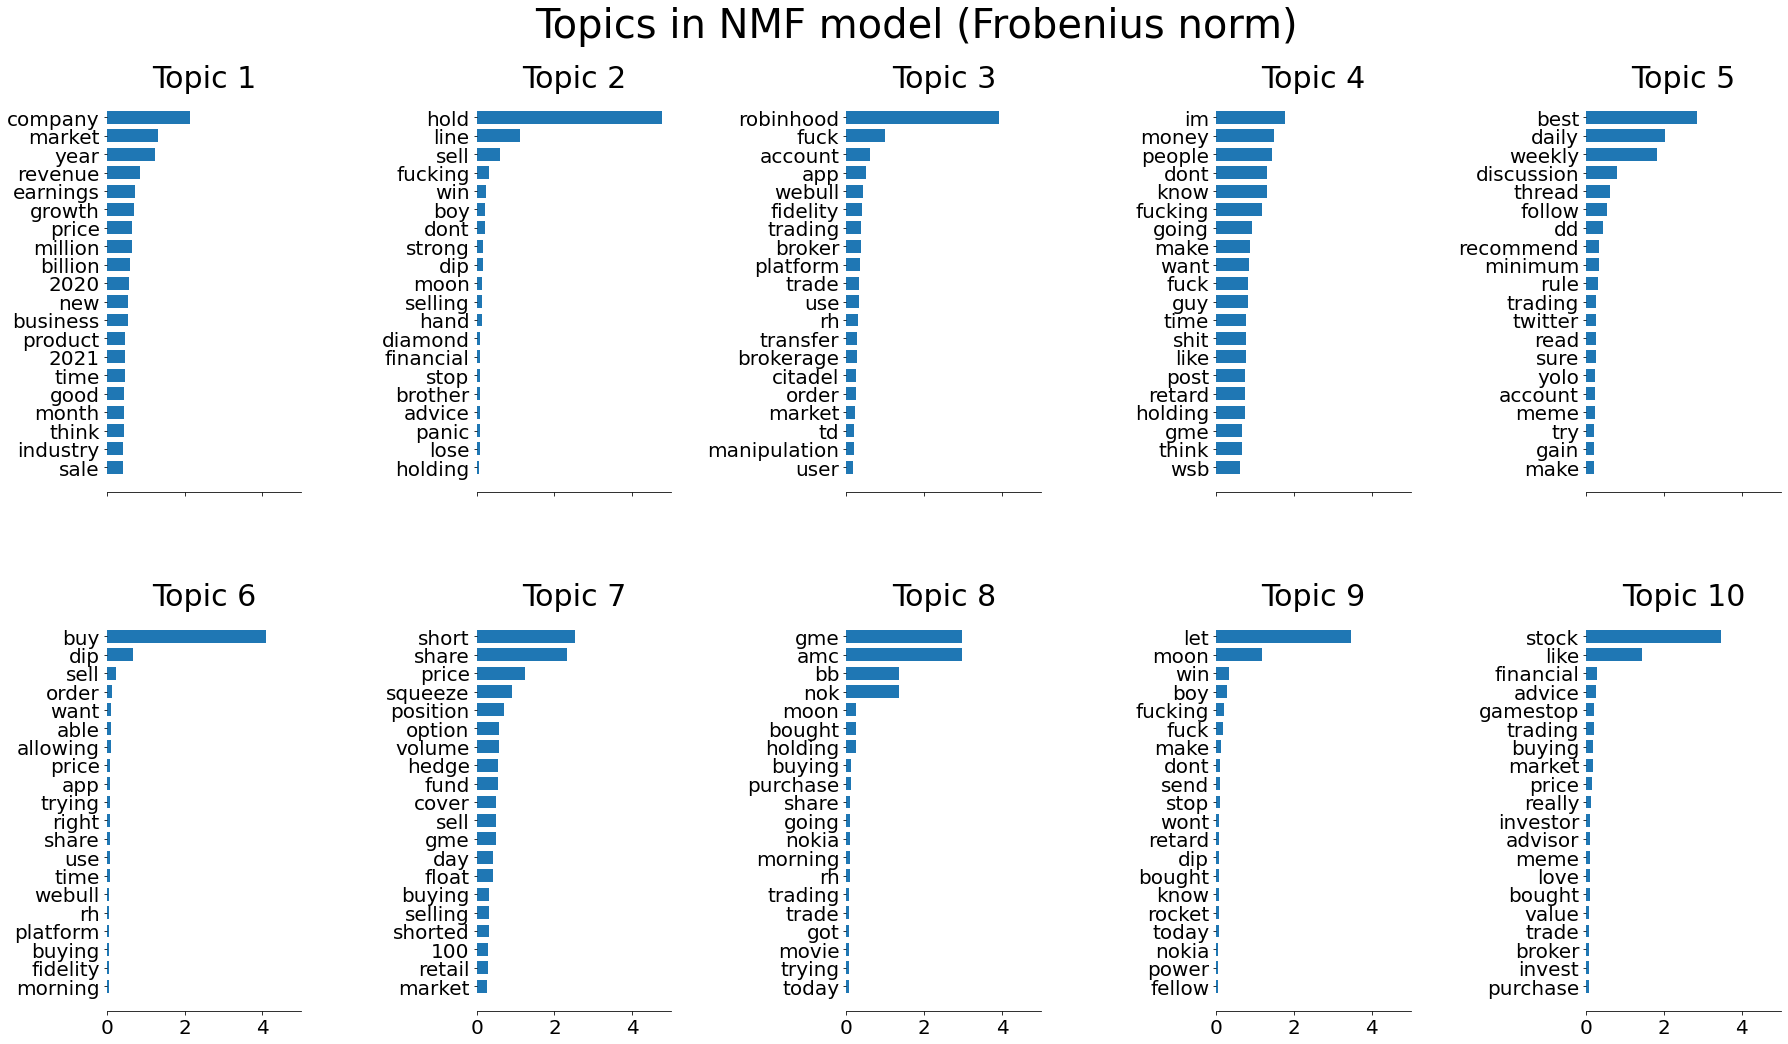

In [ ]:
nmf = NMF(n_components=n_components, random_state=1).fit(tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features n_features=1000.

The Kullback–Leibler divergence (also called relative entropy and I-divergence), is a type of statistical distance: a measure of how one probability distribution P is different from a second, reference probability distribution Q. The unnormalized generalization of Kullback-Leibler (KL) divergence is commonly used in Nonnegative Matrix Factorization (NMF). 

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


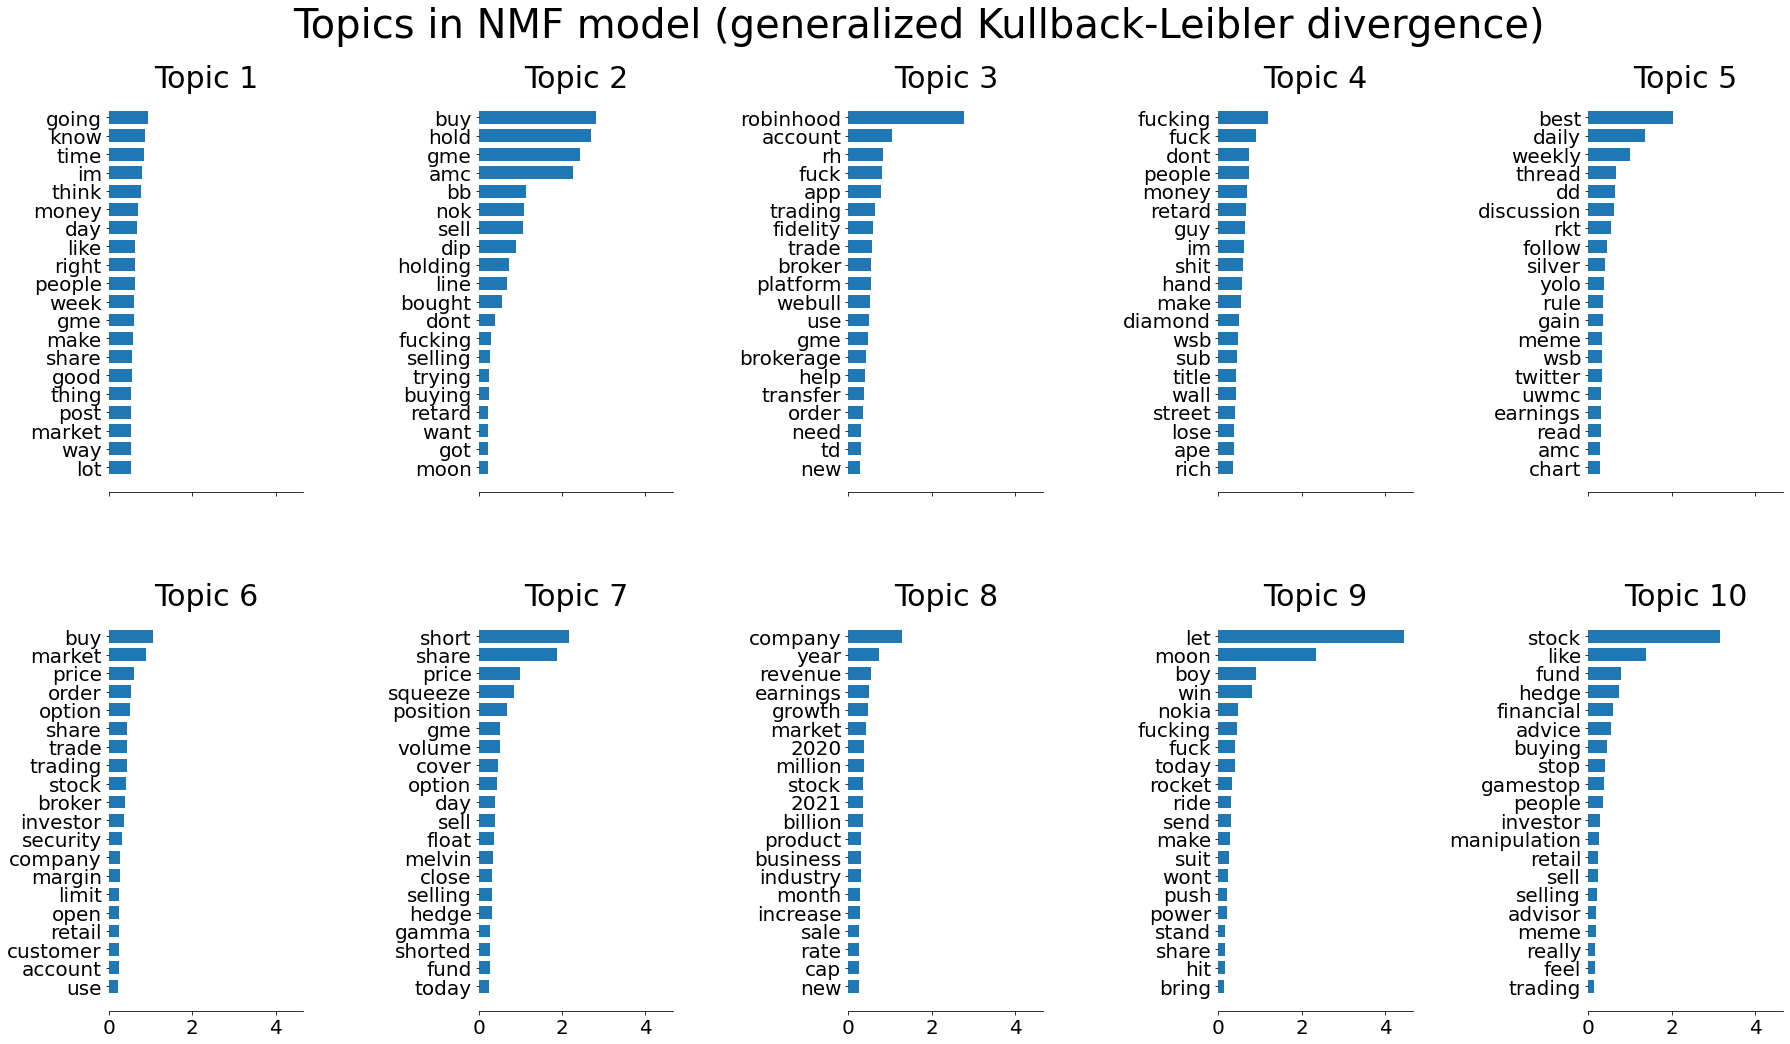

In [ ]:
nmf = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu", # 
    max_iter=1000,
   ).fit(tfidf)


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

Fitting LDA models with tf features n_features=1000

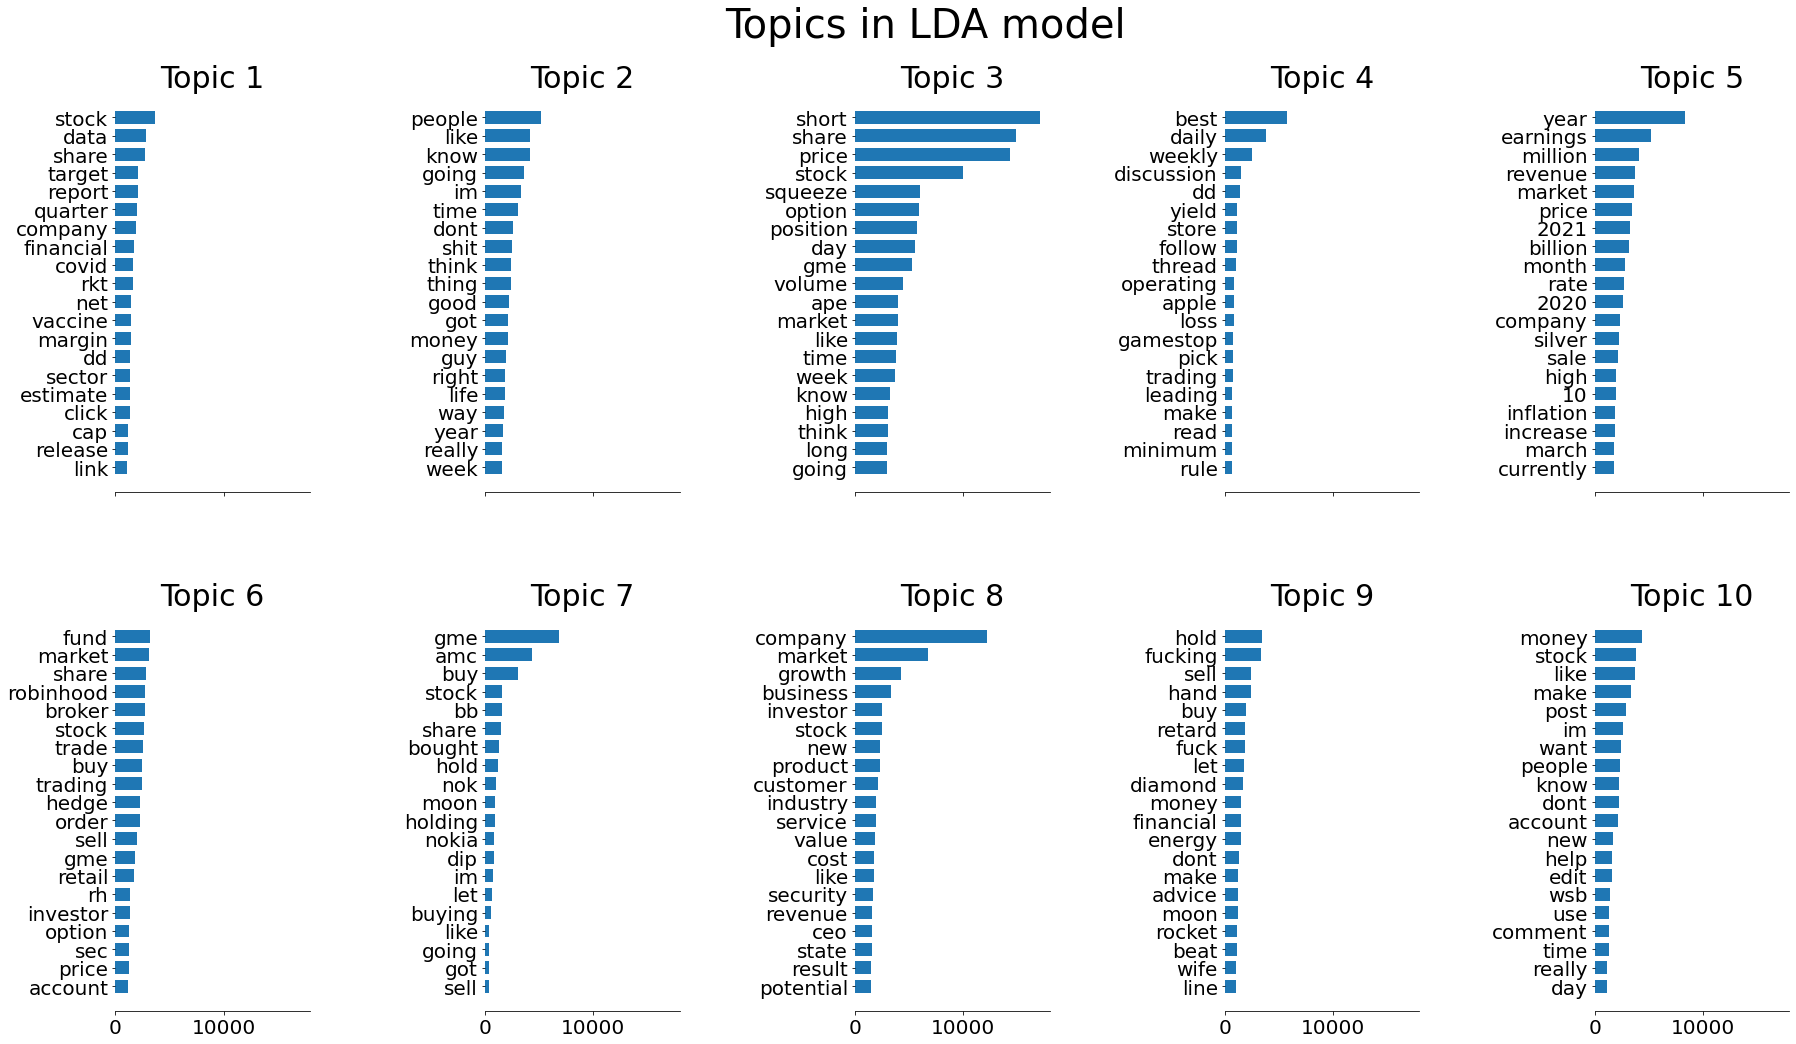

In [ ]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)

lda.fit(tf)
lda_output=lda.fit_transform(tf)
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

For each topic we'll print the 20 most significant words, hence mathematically speaking the words with the highest probability to appear in the topic. This is showing some interesting patterns already: topic 1 to topic 5 will be related to markets, stocks, options, and everything realted to finance. They have the stock names, like gme, amc, and ; topic 7 seems linked to daily trading discussion thread
### Checking the results:
We can check the proportion of topics that have been assigned to the a document using the lines of code given below..



In [ ]:
original_body_list = df.original_body.tolist()
doc_n = 2179
print('\033[1m' + 'Text: ' + '\033[0m', original_body_list[doc_n])


Text:  Kept my buy orders open and jumped in this morning, NOK, AMC - down 20+% f'em;  i'm staying the course.


In [ ]:
lda.fit_transform(tf[2179])

array([[0.01000193, 0.01000159, 0.01000172, 0.01000174, 0.01000167,
        0.0100019 , 0.90998397, 0.01000157, 0.01000198, 0.01000193]])

In [ ]:
print('\033[1m' + 'Topic: ' + '\033[0m')
for i,topic in enumerate(lda_output[doc_n]):
  print("Topic ",i+1,": ",round(topic*100,3),"%")

Topic: 
Topic  1 :  1.0 %
Topic  2 :  1.0 %
Topic  3 :  1.0 %
Topic  4 :  1.0 %
Topic  5 :  1.0 %
Topic  6 :  1.001 %
Topic  7 :  90.999 %
Topic  8 :  1.0 %
Topic  9 :  1.0 %
Topic  10 :  1.0 %


### Conclusion
Finding patterns and understanding the hidden structure of data is a complicated task. Especially when we are dealing with messy and unstructured data as text. Topic models such as Latent Dirichlet Allocation or NMF are useful techniques to discover the most prominent topics in such documents. While these results are often very revealing already, it's also possible to use them as a starting point, for example for a labeling exercise for supervised text classification. 